> # For this simple solution we will try classify passengers in few steps:
> 
>  * **Explore your Data**  
>
>  * **Exploratory Data Analysis (EDA)**
> 
>  * **Making Decisions**
>
>  * **Cleaning & Missing Data Handling**
> 
>  * **Prepare our data for ML**
> 
>  * **Machine Learning (ML)** 

# Don't Forget to Upvote

**Note:**
 * *SibSp = number of sisters + number of brothers + his/her spouse*   (as it refers to sibling and spouse)
 * *Parch = number of parents travelled with him + number of chiledren*  (as it refers to parent and children)

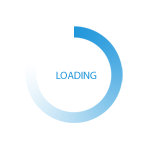

In [ ]:
# Data Analysis
import numpy as np
import pandas as pd
import random

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Models
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

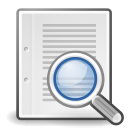

# Data Head

In [ ]:
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
datasets = [train_data, test_data]
train_data.head()

# Some Info

In [ ]:
train_data.info()

In [ ]:
test_data.info()

**Now we knew some important things:-**
1. Most of Cabin Feature are missing data

2. Our data has different types such that :
    * {PassengerId, Age, SibSp, Parch, Fare} are numerical
    * {survived, Name, Sex, Ticket, Cabin, Embarked, Pclass} are Categorical
    
3. Some Features might be unnecessary like :
    * PassengerId -> Because it doesn't mean anything
    * Name -> also it doesn't mean anything but we may extract some important information from it like titles
    * Ticket -> it is also doesn't mean anything
    * Cabin -> most of it are empty so we can't know is it efficient or not
  

# Describe numerical data

In [ ]:
train_data.describe(exclude=['O'])

# Describe categorical data

In [ ]:
train_data.describe(include=['O'])


As we see here there is another reason here to drop ticket -> it has a lot of duplicates

In [ ]:
plt.hist(train_data.loc[train_data['Embarked'].notnull(), 'Embarked'], bins=3)
plt.xlabel('Embarked')
plt.ylabel('Number of passengers')
plt.title('The differences among all embarks')
plt.show()


> # EDA
**Let us see the relation among our features and our target**

*Let's start with sex feature*

In [ ]:
ax = sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title('Correlation between Sex and Survived')
plt.show()

Men = train_data[train_data['Sex'] == 'male']['Sex'].count()
survived_men = train_data[(train_data['Sex'] == 'male') & (train_data['Survived'] == 1)]['Sex'].count()
Women = train_data[train_data['Sex'] == 'female']['Sex'].count()
survived_women = train_data[(train_data['Sex'] == 'female') & (train_data['Survived'] == 1)]['Sex'].count()

print('The ratio of survived men : '+ '%' +str(round(100*survived_men / Men, 2)) )
print('The ratio of survived women : '+ '%' +str(round(100*survived_women / Women, 2)) )

***As we can see women have a high ratio of survival, So 'Sex' feature is important***

what about 'Pclass' & 'Embarked' features

In [ ]:
ax = sns.barplot(data= train_data, x= 'Pclass', y='Survived')
plt.title('Correlation between Pclass and Survived')
plt.show()

In [ ]:
ax = sns.barplot(data= train_data, x= 'Embarked', y='Survived')
plt.title('Correlation between Embarked and Survived')
plt.show()

**As we can see again 'Embarked' & 'Pclass' have their effect on 'Survived'**

Now we want to do the same thing with 'Fare' but first let's cut it into 3 bands

In [ ]:
train_data['bands'] = pd.qcut(train_data['Fare'], 3)
train_data['bands'].unique()

**why don't we do that on 'Fare' feature and remove bands from our dataframe. 
in addition, we can make them categories.**

In [ ]:
for dataset in datasets:
    
    dataset.loc[(-0.001 < dataset['Fare']) & (dataset['Fare'] <= 8.662), 'Fare'] = 0
    dataset.loc[(8.662 < dataset['Fare']) & (dataset['Fare'] <= 26.0), 'Fare'] = 1
    dataset.loc[(26.0 < dataset['Fare']) & (dataset['Fare'] <= 513.329), 'Fare'] = 2
    
   
    dataset['Fare'] = dataset.loc[dataset['Fare'].notnull(), 'Fare'].astype(int)


In [ ]:
print(train_data['Fare'].unique())
print(test_data['Fare'].unique())

In [ ]:
ax = sns.pointplot(data=train_data, x='Fare', y='Survived')
plt.title('Correlation between Fare and Survived')
plt.show()

**As we can see here, there is a positive correlation between 'Fare' and 'Survived'**

Same thing with Age

In [ ]:
train_data['AgeBands'] = pd.qcut(train_data['Age'], 5)
train_data['AgeBands'].unique()

In [ ]:
for dataset in datasets:
    
    dataset.loc[dataset['Age'] <= 19, 'Age'] = 10
    dataset.loc[(19 < dataset['Age'] ) & (dataset['Age'] <= 25), 'Age' ] = 20
    dataset.loc[(25.0 < dataset['Age'] ) & (dataset['Age'] <= 31.8), 'Age' ] = 30
    dataset.loc[(31.8 < dataset['Age'] ) & (dataset['Age'] <= 41.0), 'Age' ] = 40
    dataset.loc[(41.0 < dataset['Age'] ) & (dataset['Age'] <= 80.0), 'Age' ] = 50
    
    dataset['Age'] = dataset.loc[dataset['Age'].notnull(), 'Age'].astype(int)

In [ ]:
print(train_data['Age'].unique())
print(test_data['Age'].unique())

In [ ]:
sns.barplot(data= train_data, x='Age', y='Survived')
plt.title('Correlation between Age and Survived')

**Let's classify them into three categories:**
   * child (2)
   * Old & youth (0) 
   * else (1)

In [ ]:
train_data.loc[(train_data['Age'] == 10), 'Age'] = 2
train_data.loc[(train_data['Age'] == 20) | (train_data['Age'] == 50), 'Age'] = 0
train_data.loc[(train_data['Age'] == 30) | (train_data['Age'] == 40), 'Age'] = 1

test_data.loc[(test_data['Age'] == 10), 'Age'] = 2
test_data.loc[(test_data['Age'] == 20) | (test_data['Age'] == 50), 'Age'] = 0
test_data.loc[(test_data['Age'] == 30) | (test_data['Age'] == 40), 'Age'] = 1


# Let's give those null values the median of ages in their pclass
for pclass in range(1, 4):
    
    train_data.loc[ (train_data['Pclass'] == pclass) & (train_data['Age'].isnull()), 'Age'] = train_data.loc[ (train_data['Pclass'] == pclass) & (train_data['Age'].notnull()), 'Age' ].median()
    test_data.loc[ (test_data['Pclass'] == pclass) & (test_data['Age'].isnull()), 'Age'] = test_data.loc[ (test_data['Pclass'] == pclass) & (test_data['Age'].notnull()), 'Age' ].median()

Now we want to know the correlation between both 'Parch' and 'SibSp' with 'Survived'

In [ ]:
parchValues = train_data['Parch'].unique()
SibSpValues = train_data['SibSp'].unique()

In [ ]:
train_data[ ['Parch', 'Survived'] ].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False) 

In [ ]:
train_data[ ['SibSp', 'Survived'] ].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

> **I think we can group them as two category:**

**for Parch:**
 * *0 -> refers to 4 or more and zero and it's bad*
 * *1 -> refers to [1, 2, 3] and it's good*
 
**for SibSp**
 * *0 -> refers to three or more values*
 * *1 -> refers to less than three*

> **Okay, now let's do some actions:**
>  * Drop some features
>  * make bands for the features which we said above
>  * handle missing values

**Dropping**

In [ ]:
print('The shape before deletion for train data: ' + str(train_data.shape))
print('The shape before deletion for test data: ' + str(test_data.shape))


train_data = train_data.drop(['Ticket', 'PassengerId', 'Cabin', 'AgeBands', 'bands'], axis=1)
test_data = test_data.drop(['Ticket', 'PassengerId', 'Cabin'], axis=1)
    
print('\nThe shape after deletion for train data: ' + str(train_data.shape))
print('The shape after deletion for test data: ' + str(test_data.shape))

**Handling missing values**

*Actually, we don't have missing data instead of that in 'Embarked' so we can skip this step*
* for this to missing values in 'Embarked' we will give it the mode in 'Embarked'
* and one missing value in 'Fare' in test data

In [ ]:
train_data.loc[train_data['Embarked'].isnull(), 'Embarked'] = 'S'
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = test_data['Fare'].median()

test_data['Fare'] = test_data['Fare'].astype(int)

**Categorize ( make numerical bands )**

we will categorize Sex, SibSp, Parch and Embarked

In [ ]:
# Their actual ratios
sexMap = {'male':0.1889, 'female':0.742}
embarkedMap = {'S':0.34, 'Q':0.38, 'C':0.55}
PclassMap = {3:0.22, 2:0.46, 1:0.62}

# Some feature engineering
train_data['isAlone'] = 0
train_data.loc[ (train_data['SibSp'] == 0) & (train_data['Parch'] == 0) , 'isAlone'] = 1

test_data['isAlone'] = 0
test_data.loc[ (test_data['SibSp'] == 0) & (test_data['Parch'] == 0) , 'isAlone'] = 1




# For trainning data
train_data['Embarked'] = train_data['Embarked'].map(embarkedMap)
train_data['Sex'] = train_data['Sex'].map(sexMap)
train_data['Pclass'] = train_data['Pclass'].map(PclassMap)
    
train_data.loc[train_data['SibSp'] >= 3, 'SibSp'] = 0
train_data.loc[train_data['SibSp'] < 3, 'SibSp'] = 1
    
    
train_data.loc[train_data['Parch'] >= 4, 'Parch'] = 0
train_data.loc[(train_data['Parch'] > 0) & (train_data['Parch'] < 4), 'Parch'] = 1



# For test data
test_data['Embarked'] = test_data['Embarked'].map(embarkedMap)
test_data['Sex'] = test_data['Sex'].map(sexMap) 
test_data['Pclass'] = test_data['Pclass'].map(PclassMap)
    
test_data.loc[test_data['SibSp'] >= 3, 'SibSp'] = 0
test_data.loc[test_data['SibSp'] < 3, 'SibSp'] = 1 
    
test_data.loc[test_data['Parch'] >= 4, 'Parch'] = 0
test_data.loc[(test_data['Parch'] > 0) & (test_data['Parch'] < 4), 'Parch'] = 1


Now we will extract title from name and then remove name

In [ ]:
train_data['Title'] = train_data.Name.str.extract(r'(\w+)\.')
train_data = train_data.drop('Name', axis=1)

test_data['Title'] = test_data.Name.str.extract(r'(\w+)\.')
test_data = test_data.drop('Name', axis= 1)

train_data['Title'].unique()

* ***Let's see the effect of each title***

In [ ]:
titles = train_data['Title'].unique()
numDict = dict()
for title in titles:
    numDict[title] = train_data.loc[ train_data['Title'] == title, 'Title' ].count()

df = train_data[ ['Title', 'Survived'] ].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending= False)
df['Repeated'] = [numDict[title] for title in df['Title']]
df

***let's categorize them***
* we gave the rarely-appear titles nutral values

In [ ]:
# Positive correlation
train_data = train_data.replace(['Countess', 'Ms', 'Mme', 'Lady', 'Dona', 'Mlle', 'Mrs', 'Miss', 'Master', 'Dr'], 2)
test_data = test_data.replace(['Countess', 'Ms', 'Mme', 'Lady', 'Dona', 'Mlle', 'Mrs', 'Miss', 'Master', 'Dr'], 2)

# Nutral correlation
train_data = train_data.replace(['Col', 'Major', 'Sir', 'Capt'], 1)
test_data = test_data.replace(['Col', 'Major', 'Sir', 'Capt'], 1)

# Negative correlation
train_data = train_data.replace(['Rev', 'Mr', 'Jonkheer', 'Don'], 0)
test_data = test_data.replace(['Rev', 'Mr', 'Jonkheer', 'Don'], 0)

>  # ML Models

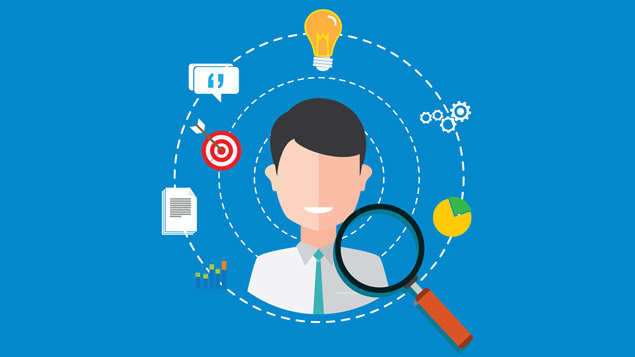

In [ ]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

**Logistic Regression**

In [ ]:
log_model = LogisticRegression()
log_model.fit(X, y)
log_model_score = round(log_model.score(X, y) * 100, 2)
print('%' + str(log_model_score))

**DecisionTreeClassifier**

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)
tree_model_score = round(tree_model.score(X, y) * 100, 2)
print('%' + str(tree_model_score))

**RandomForestClassifier**

In [ ]:
forest_model = RandomForestClassifier()
forest_model.fit(X, y)
forest_model_score = round(forest_model.score(X, y) * 100, 2)
print('%' + str(forest_model_score))

**SVC**

In [ ]:
SVC_model = SVC()
SVC_model.fit(X, y)
SVC_model_score = round(SVC_model.score(X, y) * 100, 2)
print('%' + str(SVC_model_score))

**Linear_SVC**

In [ ]:
Linear_SVC_model = LinearSVC()
Linear_SVC_model.fit(X, y)
Linear_SVC_model_score = round(Linear_SVC_model.score(X, y) * 100, 2)
print('%' + str(Linear_SVC_model_score))

**GaussianNB**

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X, y)
nb_model_score = round(nb_model.score(X, y) * 100, 2)
print('%' + str(nb_model_score))

**KNeighborsClassifier**

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
knn_model_score = round(knn_model.score(X, y) * 100, 2)
print('%' + str(knn_model_score))

**Perceptron**

In [ ]:
Perceptron_model = Perceptron()
Perceptron_model.fit(X, y)
Perceptron_model_score = round(Perceptron_model.score(X, y) * 100, 2)
print('%' + str(Perceptron_model_score))

**SGDClassifier**

In [ ]:
SGD_model = SGDClassifier()
SGD_model.fit(X, y)
SGD_model_score = round(SGD_model.score(X, y) * 100, 2)
print('%' + str(SGD_model_score))

**Since RandomForestClassifier is the best model we will use it.**

> # Submission

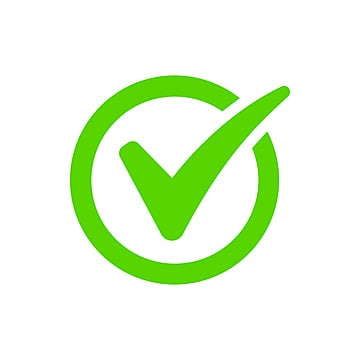

In [ ]:
ourPred = forest_model.predict(test_data)
testReal = pd.read_csv('../input/titanic/test.csv')
submission = pd.DataFrame({
        "PassengerId": testReal["PassengerId"],
        "Survived": ourPred
    })
submission.to_csv('submission.csv', index=False)
